In [1]:
import os
import sys
from glob import glob
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras import applications as app
from keras import backend as k
import numpy as np
import PIL
import scipy
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
results_dir = 'results'

In [5]:
os.path.exists(results_dir)

True

## Best Glaucoma Examples

In [14]:
case_0_0 = glob(os.path.join(results_dir, '**/examples_0_0*'), recursive=True)

In [19]:
case_0_0

['results/InceptionV3/examples_0_0InceptionV3.csv',
 'results/ResNet50/examples_0_0ResNet50.csv',
 'results/Xception/examples_0_0Xception.csv',
 'results/VGG16/examples_0_0VGG16.csv',
 'results/VGG19/examples_0_0VGG19.csv']

In [22]:
df = pd.concat((pd.read_csv(f, header=0) for f in case_0_0), ignore_index=True, axis=0)

In [23]:
df

,0,/dataset/ACRIMA/Glaucoma/Im649_g_ACRIMA.jpg,/dataset/ACRIMA/Glaucoma/Im507_g_ACRIMA.jpg,/dataset/ACRIMA/Glaucoma/Im395_g_ACRIMA.jpg,/dataset/ACRIMA/Glaucoma/Im386_g_ACRIMA.jpg
0,1,/dataset/ACRIMA/Glaucoma/Im350_g_ACRIMA.jpg,NaN,NaN,NaN
1,2,/dataset/ACRIMA/Glaucoma/Im536_g_ACRIMA.jpg,NaN,NaN,NaN
2,3,/dataset/ACRIMA/Glaucoma/Im434_g_ACRIMA.jpg,NaN,NaN,NaN
3,4,/dataset/ACRIMA/Glaucoma/Im535_g_ACRIMA.jpg,NaN,NaN,NaN
4,5,/dataset/ACRIMA/Glaucoma/Im541_g_ACRIMA.jpg,NaN,NaN,NaN
...,...,...,...,...,...
70,11,NaN,/dataset/ACRIMA/Glaucoma/Im397_g_ACRIMA.jpg,NaN,NaN
71,12,NaN,/dataset/ACRIMA/Glaucoma/Im575_g_ACRIMA.jpg,NaN,NaN
72,13,NaN,/dataset/ACRIMA/Glaucoma/Im398_g_ACRIMA.jpg,NaN,NaN
73,14,NaN,/dataset/ACRIMA/Glaucoma/Im556_g_ACRIMA.jpg,NaN,NaN


In [35]:
li = []
for f in case_0_0:
    df = pd.read_csv(f, usecols=[1], squeeze=True)
    li.append(df)


<ipython-input-35-569d2fb10cd1>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(f, usecols=[1], squeeze=True)
<ipython-input-35-569d2fb10cd1>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(f, usecols=[1], squeeze=True)
<ipython-input-35-569d2fb10cd1>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(f, usecols=[1], squeeze=True)
<ipython-input-35-569d2fb10cd1>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(f, usecols=[1], squeeze=True)
<ipython-input-35-569d2fb10cd1>:3: FutureWarning: The squeeze ar

In [36]:
li

[0     /dataset/ACRIMA/Glaucoma/Im350_g_ACRIMA.jpg
 1     /dataset/ACRIMA/Glaucoma/Im536_g_ACRIMA.jpg
 2     /dataset/ACRIMA/Glaucoma/Im434_g_ACRIMA.jpg
 3     /dataset/ACRIMA/Glaucoma/Im535_g_ACRIMA.jpg
 4     /dataset/ACRIMA/Glaucoma/Im541_g_ACRIMA.jpg
 5     /dataset/ACRIMA/Glaucoma/Im656_g_ACRIMA.jpg
 6     /dataset/ACRIMA/Glaucoma/Im679_g_ACRIMA.jpg
 7     /dataset/ACRIMA/Glaucoma/Im479_g_ACRIMA.jpg
 8     /dataset/ACRIMA/Glaucoma/Im666_g_ACRIMA.jpg
 9     /dataset/ACRIMA/Glaucoma/Im471_g_ACRIMA.jpg
 10    /dataset/ACRIMA/Glaucoma/Im614_g_ACRIMA.jpg
 11    /dataset/ACRIMA/Glaucoma/Im492_g_ACRIMA.jpg
 12    /dataset/ACRIMA/Glaucoma/Im353_g_ACRIMA.jpg
 13    /dataset/ACRIMA/Glaucoma/Im646_g_ACRIMA.jpg
 14    /dataset/ACRIMA/Glaucoma/Im615_g_ACRIMA.jpg
 Name: /dataset/ACRIMA/Glaucoma/Im649_g_ACRIMA.jpg, dtype: object,
 0     /dataset/ACRIMA/Glaucoma/Im316_g_ACRIMA.jpg
 1     /dataset/ACRIMA/Glaucoma/Im590_g_ACRIMA.jpg
 2     /dataset/ACRIMA/Glaucoma/Im374_g_ACRIMA.jpg
 3     /dataset

In [39]:
examples = pd.concat(li, axis=0, ignore_index=True)

In [40]:
examples

0     /dataset/ACRIMA/Glaucoma/Im350_g_ACRIMA.jpg
1     /dataset/ACRIMA/Glaucoma/Im536_g_ACRIMA.jpg
2     /dataset/ACRIMA/Glaucoma/Im434_g_ACRIMA.jpg
3     /dataset/ACRIMA/Glaucoma/Im535_g_ACRIMA.jpg
4     /dataset/ACRIMA/Glaucoma/Im541_g_ACRIMA.jpg
                         ...                     
70    /dataset/ACRIMA/Glaucoma/Im397_g_ACRIMA.jpg
71    /dataset/ACRIMA/Glaucoma/Im575_g_ACRIMA.jpg
72    /dataset/ACRIMA/Glaucoma/Im398_g_ACRIMA.jpg
73    /dataset/ACRIMA/Glaucoma/Im556_g_ACRIMA.jpg
74    /dataset/ACRIMA/Glaucoma/Im555_g_ACRIMA.jpg
Length: 75, dtype: object

In [41]:
examples.value_counts()

/dataset/ACRIMA/Glaucoma/Im344_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im316_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im536_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im567_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im334_g_ACRIMA.jpg    2
                                              ..
/dataset/ACRIMA/Glaucoma/Im313_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im580_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im544_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im505_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im555_g_ACRIMA.jpg    1
Length: 64, dtype: int64

In [44]:
temp = examples.value_counts()

In [45]:
temp

/dataset/ACRIMA/Glaucoma/Im344_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im316_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im536_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im567_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im334_g_ACRIMA.jpg    2
                                              ..
/dataset/ACRIMA/Glaucoma/Im313_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im580_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im544_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im505_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im555_g_ACRIMA.jpg    1
Length: 64, dtype: int64

In [51]:
best_ex = temp[temp > 1].index.tolist()

In [14]:
def visualize_examples(examples, limit=None, ncol = 4):
    paths = []
    fig = plt.figure(figsize=(16, 12))
    if not limit:
        nrows = np.ceil(len(examples)/ncol).astype(int)
    else:
        nrows = np.ceil(limit/ncol).astype(int)
    for iter, ex in enumerate(examples):
        if iter == limit:
            break
        try:
            im = mpimg.imread(ex)
            fig.add_subplot(nrows, ncol, iter + 1)
            plt.imshow(im)
        except IndexError as ie:
            print(ie)
            print(f'Issue in finding {ex}')
    plt.tight_layout()
    plt.show()

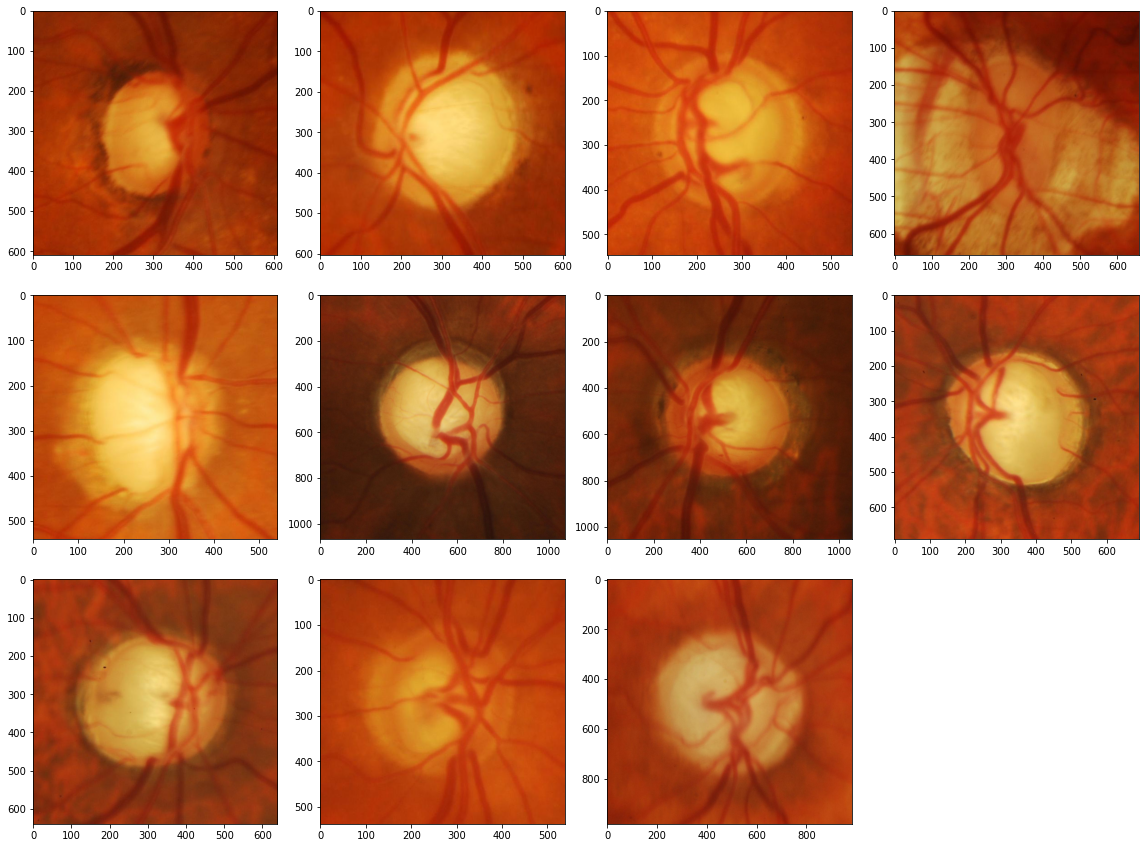

In [52]:
visualize_examples(best_ex)

## Best Healthy examples

In [3]:
case_1_1 = glob(os.path.join(results_dir, '**/examples_1_1*'), recursive=True)

In [4]:
case_1_1

['results\\InceptionV3\\examples_1_1InceptionV3.csv',
 'results\\ResNet50\\examples_1_1ResNet50.csv',
 'results\\VGG16\\examples_1_1VGG16.csv',
 'results\\VGG19\\examples_1_1VGG19.csv',
 'results\\Xception\\examples_1_1Xception.csv']

In [7]:
li = []
for f in case_1_1:
    df = pd.read_csv(f, usecols=[1])
    df = np.squeeze(df)
    li.append(df)


In [8]:
examples = pd.concat(li, axis=0, ignore_index=True)

In [9]:
examples

0     /dataset/ACRIMA/Healthy/Im096_ACRIMA.jpg
1     /dataset/ACRIMA/Healthy/Im117_ACRIMA.jpg
2     /dataset/ACRIMA/Healthy/Im211_ACRIMA.jpg
3     /dataset/ACRIMA/Healthy/Im212_ACRIMA.jpg
4     /dataset/ACRIMA/Healthy/Im116_ACRIMA.jpg
                        ...                   
70    /dataset/ACRIMA/Healthy/Im079_ACRIMA.jpg
71    /dataset/ACRIMA/Healthy/Im152_ACRIMA.jpg
72    /dataset/ACRIMA/Healthy/Im288_ACRIMA.jpg
73    /dataset/ACRIMA/Healthy/Im056_ACRIMA.jpg
74    /dataset/ACRIMA/Healthy/Im093_ACRIMA.jpg
Length: 75, dtype: object

In [21]:
examples = examples.replace(to_replace=r'/dataset*',value=r'../Datasets', regex=True)

In [22]:
examples

0     ../Datasets/ACRIMA/Healthy/Im096_ACRIMA.jpg
1     ../Datasets/ACRIMA/Healthy/Im117_ACRIMA.jpg
2     ../Datasets/ACRIMA/Healthy/Im211_ACRIMA.jpg
3     ../Datasets/ACRIMA/Healthy/Im212_ACRIMA.jpg
4     ../Datasets/ACRIMA/Healthy/Im116_ACRIMA.jpg
                         ...                     
70    ../Datasets/ACRIMA/Healthy/Im079_ACRIMA.jpg
71    ../Datasets/ACRIMA/Healthy/Im152_ACRIMA.jpg
72    ../Datasets/ACRIMA/Healthy/Im288_ACRIMA.jpg
73    ../Datasets/ACRIMA/Healthy/Im056_ACRIMA.jpg
74    ../Datasets/ACRIMA/Healthy/Im093_ACRIMA.jpg
Length: 75, dtype: object

In [23]:
temp = examples.value_counts()

In [24]:
temp

../Datasets/ACRIMA/Healthy/Im234_ACRIMA.jpg    2
../Datasets/ACRIMA/Healthy/Im215_ACRIMA.jpg    2
../Datasets/ACRIMA/Healthy/Im093_ACRIMA.jpg    2
../Datasets/ACRIMA/Healthy/Im227_ACRIMA.jpg    2
../Datasets/ACRIMA/Healthy/Im070_ACRIMA.jpg    2
                                              ..
../Datasets/ACRIMA/Healthy/Im092_ACRIMA.jpg    1
../Datasets/ACRIMA/Healthy/Im230_ACRIMA.jpg    1
../Datasets/ACRIMA/Healthy/Im081_ACRIMA.jpg    1
../Datasets/ACRIMA/Healthy/Im282_ACRIMA.jpg    1
../Datasets/ACRIMA/Healthy/Im056_ACRIMA.jpg    1
Name: count, Length: 70, dtype: int64

In [25]:
best_ex = temp[temp > 1].index.tolist()

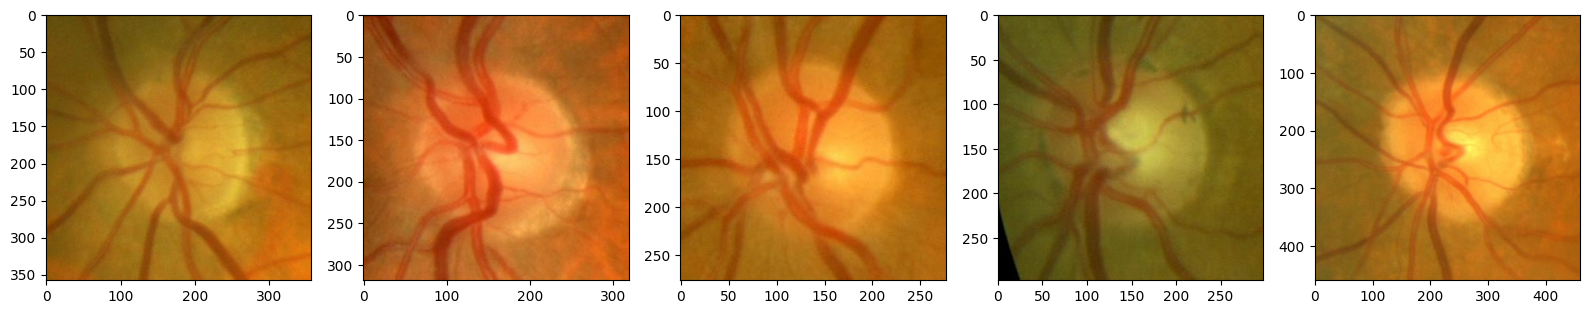

In [27]:
visualize_examples(best_ex, ncol=5)

## Worst misclassifications True: Healthy Predicted: Glaucoma

In [28]:
case_0_1 = glob(os.path.join(results_dir, '**/examples_0_1*'), recursive=True)

In [29]:
case_0_1

['results\\InceptionV3\\examples_0_1InceptionV3.csv',
 'results\\ResNet50\\examples_0_1ResNet50.csv',
 'results\\VGG16\\examples_0_1VGG16.csv',
 'results\\VGG19\\examples_0_1VGG19.csv',
 'results\\Xception\\examples_0_1Xception.csv']

In [34]:
li = []
for f in case_0_1:
    df = pd.read_csv(f, usecols=[1])
    df = np.squeeze(df)
    li.append(df)
examples = pd.concat(li, axis=0, ignore_index=True)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [33]:
li

[0     /dataset/ACRIMA/Glaucoma/Im702_g_ACRIMA.JPG
 1     /dataset/ACRIMA/Glaucoma/Im596_g_ACRIMA.jpg
 2     /dataset/ACRIMA/Glaucoma/Im654_g_ACRIMA.jpg
 3     /dataset/ACRIMA/Glaucoma/Im573_g_ACRIMA.jpg
 4     /dataset/ACRIMA/Glaucoma/Im609_g_ACRIMA.jpg
 5     /dataset/ACRIMA/Glaucoma/Im514_g_ACRIMA.jpg
 6     /dataset/ACRIMA/Glaucoma/Im562_g_ACRIMA.jpg
 7     /dataset/ACRIMA/Glaucoma/Im558_g_ACRIMA.jpg
 8     /dataset/ACRIMA/Glaucoma/Im455_g_ACRIMA.jpg
 9     /dataset/ACRIMA/Glaucoma/Im648_g_ACRIMA.jpg
 10    /dataset/ACRIMA/Glaucoma/Im606_g_ACRIMA.jpg
 11    /dataset/ACRIMA/Glaucoma/Im311_g_ACRIMA.jpg
 12    /dataset/ACRIMA/Glaucoma/Im429_g_ACRIMA.jpg
 13    /dataset/ACRIMA/Glaucoma/Im610_g_ACRIMA.jpg
 14    /dataset/ACRIMA/Glaucoma/Im461_g_ACRIMA.jpg
 Name: /dataset/ACRIMA/Glaucoma/Im557_g_ACRIMA.jpg, dtype: object,
 0    /dataset/ACRIMA/Glaucoma/Im367_g_ACRIMA.jpg
 1    /dataset/ACRIMA/Glaucoma/Im557_g_ACRIMA.jpg
 2    /dataset/ACRIMA/Glaucoma/Im598_g_ACRIMA.jpg
 3    /dataset/ACR

In [86]:
examples

0     /dataset/ACRIMA/Glaucoma/Im702_g_ACRIMA.JPG
1     /dataset/ACRIMA/Glaucoma/Im596_g_ACRIMA.jpg
2     /dataset/ACRIMA/Glaucoma/Im654_g_ACRIMA.jpg
3     /dataset/ACRIMA/Glaucoma/Im573_g_ACRIMA.jpg
4     /dataset/ACRIMA/Glaucoma/Im609_g_ACRIMA.jpg
5     /dataset/ACRIMA/Glaucoma/Im514_g_ACRIMA.jpg
6     /dataset/ACRIMA/Glaucoma/Im562_g_ACRIMA.jpg
7     /dataset/ACRIMA/Glaucoma/Im558_g_ACRIMA.jpg
8     /dataset/ACRIMA/Glaucoma/Im455_g_ACRIMA.jpg
9     /dataset/ACRIMA/Glaucoma/Im648_g_ACRIMA.jpg
10    /dataset/ACRIMA/Glaucoma/Im606_g_ACRIMA.jpg
11    /dataset/ACRIMA/Glaucoma/Im311_g_ACRIMA.jpg
12    /dataset/ACRIMA/Glaucoma/Im429_g_ACRIMA.jpg
13    /dataset/ACRIMA/Glaucoma/Im610_g_ACRIMA.jpg
14    /dataset/ACRIMA/Glaucoma/Im461_g_ACRIMA.jpg
15    /dataset/ACRIMA/Glaucoma/Im367_g_ACRIMA.jpg
16    /dataset/ACRIMA/Glaucoma/Im557_g_ACRIMA.jpg
17    /dataset/ACRIMA/Glaucoma/Im598_g_ACRIMA.jpg
18    /dataset/ACRIMA/Glaucoma/Im310_g_ACRIMA.jpg
19    /dataset/ACRIMA/Glaucoma/Im328_g_ACRIMA.jpg


In [66]:
temp = examples.value_counts()

In [67]:
temp

/dataset/ACRIMA/Glaucoma/Im598_g_ACRIMA.jpg    3
/dataset/ACRIMA/Glaucoma/Im514_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im596_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im558_g_ACRIMA.jpg    2
/dataset/ACRIMA/Glaucoma/Im702_g_ACRIMA.JPG    2
/dataset/ACRIMA/Glaucoma/Im329_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im416_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im655_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im693_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im328_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im366_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im597_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im620_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im628_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im608_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im511_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im417_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im588_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im557_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glaucoma/Im310_g_ACRIMA.jpg    1
/dataset/ACRIMA/Glau

In [68]:
best_ex = temp[temp > 1].index.tolist()

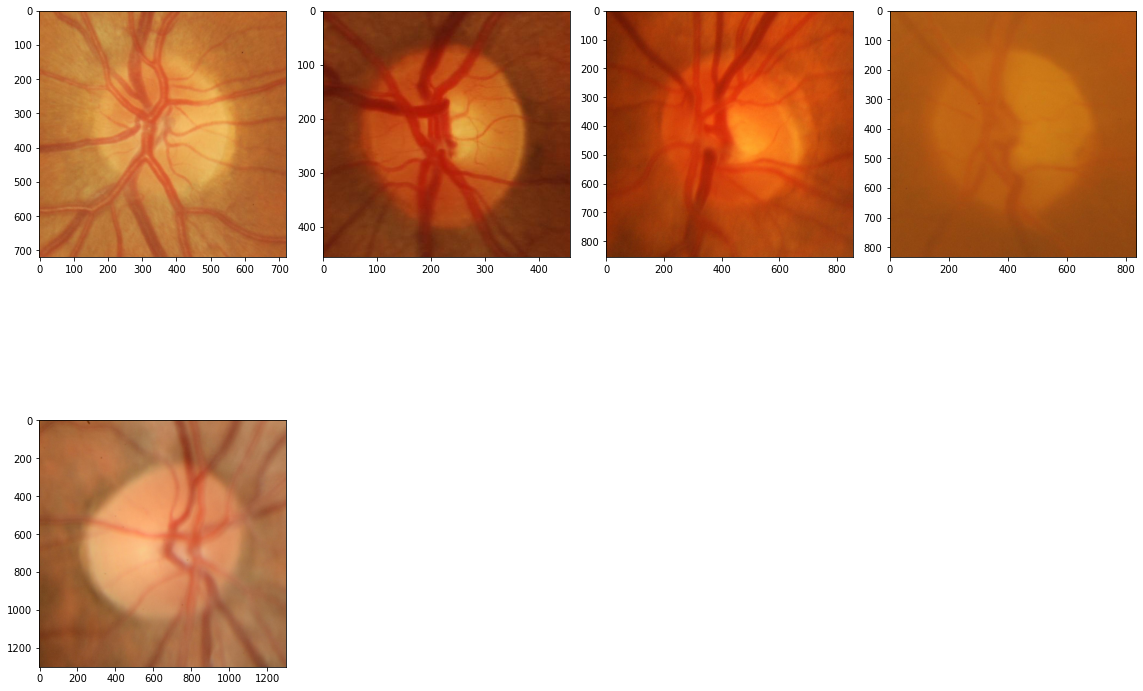

In [70]:
visualize_examples(best_ex)

## Worst misclassifications True: Glaucoma Predicted: Healthy

In [71]:
case_1_0 = glob(os.path.join(results_dir, '**/examples_1_0*'), recursive=True)

In [89]:
case_1_0

['results/InceptionV3/examples_1_0InceptionV3.csv',
 'results/VGG19/examples_1_0VGG19.csv']

In [92]:
li = []
for f in case_1_0:
    df = pd.read_csv(f, usecols=[1], squeeze=True)
    li.append(df)
examples = pd.concat(li, axis=0, ignore_index=True)

<ipython-input-92-ca80c92bf7c0>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(f, usecols=[1], squeeze=True)
<ipython-input-92-ca80c92bf7c0>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv(f, usecols=[1], squeeze=True)


In [93]:
examples

0    /dataset/ACRIMA/Healthy/Im135_ACRIMA.jpg
dtype: object

In [77]:
temp = examples.value_counts()

In [79]:
temp

/dataset/ACRIMA/Healthy/Im135_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im163_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im101_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im059_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im003_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im071_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im309_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im008_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im308_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im027_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im303_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im108_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im030_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im014_ACRIMA.jpg    1
/dataset/ACRIMA/Healthy/Im007_ACRIMA.jpg    1
dtype: int64

In [83]:
temp.index.tolist()

['/dataset/ACRIMA/Healthy/Im135_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im163_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im101_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im059_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im003_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im071_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im309_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im008_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im308_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im027_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im303_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im108_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im030_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im014_ACRIMA.jpg',
 '/dataset/ACRIMA/Healthy/Im007_ACRIMA.jpg']

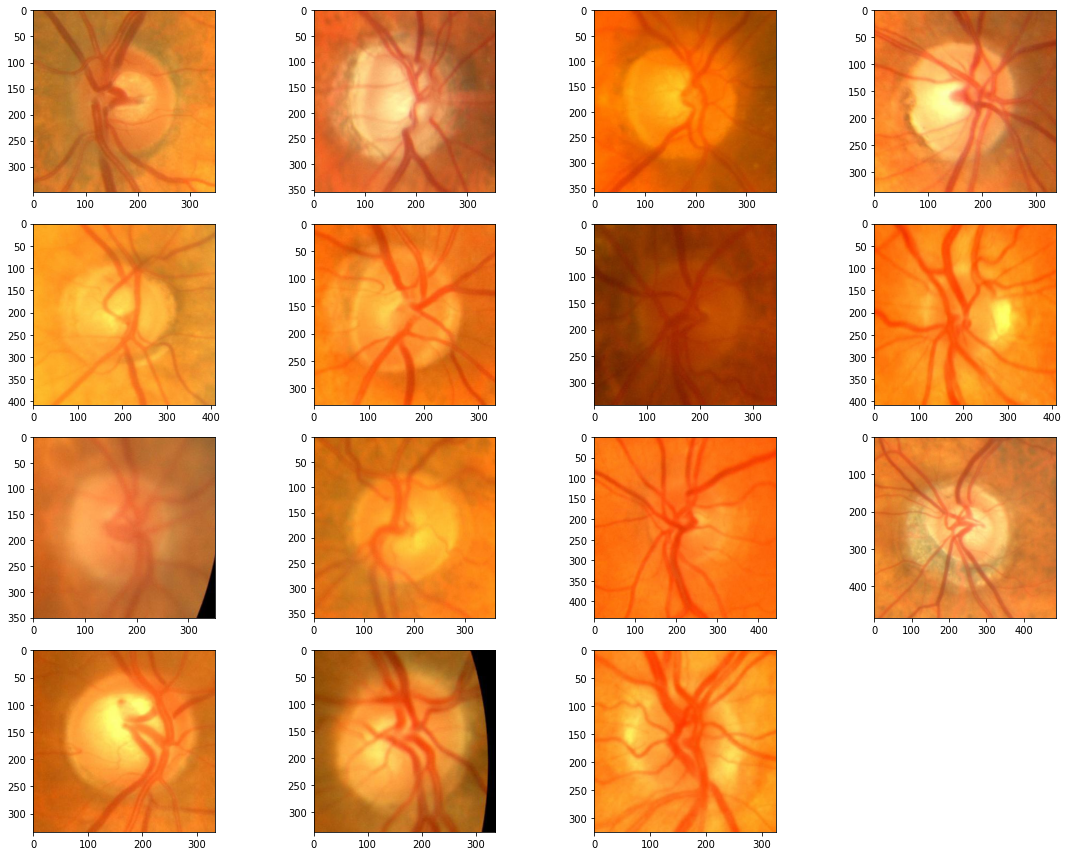

In [84]:
visualize_examples(temp.index.tolist())

We don't have examples which would appear in more than one. We only have